In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


### 기업대출 EDA


📌 DF4 RAW HEAD


,통계표,계정항목,단위,변환,2003/Q1,2003/Q2,2003/Q3,2003/Q4,2004/Q1,2004/Q2,...,2023/Q2,2023/Q3,2023/Q4,2024/Q1,2024/Q2,2024/Q3,2024/Q4,2025/Q1,2025/Q2,2025/Q3
0,"1.2.5.2.1. 산업별대출금(예금은행, 전산업)",산업별대출금,십억원,원자료,"266,338.6","277,690.2","285,246.9","284,503.9","294,659.0","295,670.5",...,"1,303,185.4","1,333,599.7","1,350,510.1","1,376,237.7","1,401,619.3","1,421,247.1","1,422,899.1","1,436,710.4","1,451,007.2","1,471,429.0"
1,"1.2.5.2.1. 산업별대출금(예금은행, 전산업)","농업, 임업 및 어업",십억원,원자료,"18,892.3","19,158.0","18,468.8","17,312.3","17,388.4","17,030.8",...,"31,675.2","32,178.4","32,241.3","32,142.6","33,264.4","33,572.8","33,447.7","33,599.1","34,004.4","34,287.6"
2,"1.2.5.2.1. 산업별대출금(예금은행, 전산업)",광업,십억원,원자료,933.1,955.5,937.0,916.4,848.0,848.4,...,"1,066.2","1,063.1",958.6,"1,062.5","1,005.9",933.1,"1,497.8","1,561.4","1,327.6","1,182.7"
3,"1.2.5.2.1. 산업별대출금(예금은행, 전산업)",제조업,십억원,원자료,"104,001.2","106,464.5","108,451.4","105,590.7","109,201.3","110,032.9",...,"408,597.9","418,966.6","420,377.8","431,952.9","438,730.7","446,969.3","447,073.5","453,649.5","459,436.4","463,356.5"
4,"1.2.5.2.1. 산업별대출금(예금은행, 전산업)",식료품 및 음료,십억원,원자료,"7,757.0","7,792.4","7,950.3","7,628.6","7,803.1","7,512.8",...,"32,402.5","32,906.1","33,740.2","34,196.2","34,210.0","34,834.5","35,601.0","35,876.5","36,348.0","36,586.3"



📌 DATE 변환 확인
NaT 개수: 0 / 91

📌 결측치 처리: 선형보간 → 잔여 NaN 행 drop
보간 후에도 NaN 남은 행 수: 0
제거된 행 수: 0

📌 합계 무결성 체크
⚠️ 아래 컬럼이 없어 합계 검증을 스킵함: ['농업, 임업 및 어업', '광업', '제조업', '전기, 가스, 증기 및 공기조절 공급업', '수도ㆍ하수 및 폐기물 처리, 원료재생업', '건설업', '서비스업']

📌 YoY + YoY 기준 Z-score 생성

📌 DF4 HEAD (전처리 + YoY/Z 포함)


계정항목,date,산업별대출금,"농업, 임업 및 어업",광업,제조업,식료품 및 음료,담배,섬유제품,"의복, 의복액세서리 및 모피제품","가죽, 가방 및 신발",...,정보통신업_yoy_z,금융 및 보험업_yoy_z,부동산업_yoy_z,"전문, 과학 및 기술 서비스업_yoy_z","사업시설관리, 사업지원 및 임대서비스업_yoy_z",교육서비스업_yoy_z,보건 및 사회복지서비스업_yoy_z,"예술, 스포츠 및 여가 관련 서비스업_yoy_z",공공행정 등 기타서비스_yoy_z,"정보통신업, 예술, 스포츠, 여가 관련_yoy_z"
0,2004-01-01,294659.0,17388.4,848.0,109201.3,7803.1,7.1,8460.4,3454.1,1372.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-04-01,295670.5,17030.8,848.4,110032.9,7512.8,21.8,8237.4,3294.5,1339.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-07-01,296491.1,16321.4,808.1,111284.6,7493.9,21.8,8063.2,3442.3,1326.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-10-01,289328.8,15125.5,823.1,109838.5,7428.9,25.1,7694.2,3157.6,1222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-01-01,292520.1,15207.0,831.0,112504.7,7755.2,10.0,7689.9,3138.0,1230.1,...,-0.681888,-2.078540,-0.588523,-1.329847,-0.851166,-0.244086,-0.177297,-0.603006,0.194154,-0.386124
5,2005-04-01,296151.4,15114.0,846.2,114513.9,7509.9,15.0,7489.4,3115.6,1174.7,...,-0.681888,-1.737444,-0.850203,-1.256897,-1.629233,-0.385034,-0.509111,-0.603006,-0.208958,-0.778429
6,2005-07-01,301395.0,14935.5,847.1,116721.5,8422.1,10.4,7423.1,3152.5,1186.0,...,-0.681888,-0.768231,-0.871897,-0.771574,-1.146944,-0.773853,-0.470232,-0.603006,-0.230555,-0.860563
7,2005-10-01,308408.9,14598.7,828.0,117702.9,8481.9,25.2,7243.2,2853.9,1164.5,...,-0.681888,0.699719,-0.114294,-0.409676,-0.063575,-0.160009,0.060731,-0.603006,0.456036,-0.152180
8,2006-01-01,318130.8,14716.0,824.3,119987.8,7852.0,25.2,7214.8,3016.2,1161.1,...,-0.681888,0.803562,0.509591,-0.537682,0.794344,0.018633,0.376541,-0.603006,1.227891,-0.264122
9,2006-04-01,329970.6,14871.0,876.8,122362.5,7827.9,25.9,7037.8,2986.6,1177.2,...,-0.681888,0.993495,1.017738,0.595163,0.880131,0.388232,0.956469,-0.603006,1.387119,0.506129



📌 DF4 SHAPE
(87, 130)

📌 DF4 DTYPES


,dtype
계정항목,
date,datetime64[ns]
산업별대출금,float64
"농업, 임업 및 어업",float64
광업,float64
제조업,float64
...,...
교육서비스업_yoy_z,float64
보건 및 사회복지서비스업_yoy_z,float64
"예술, 스포츠 및 여가 관련 서비스업_yoy_z",float64



📌 BOXPLOT (원본 수치 컬럼만: Mean / Q1 / Q3)

📊 산업별대출금
Mean: 775402.889
Q1  : 545443.650
Q3  : 988279.200


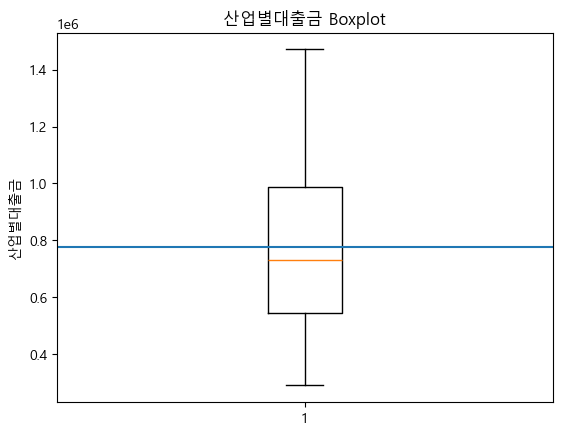


📊   농업, 임업 및 어업
Mean: 20503.379
Q1  : 15054.750
Q3  : 25024.950


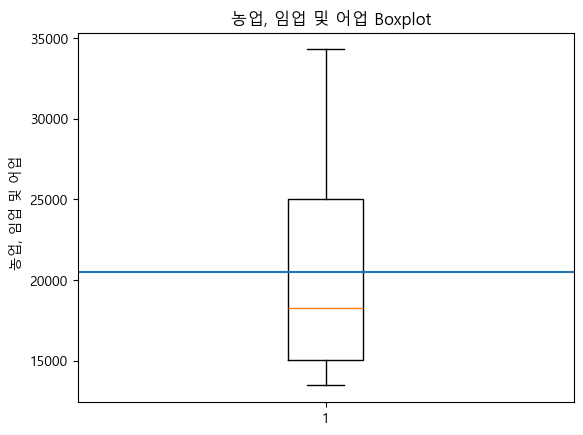


📊   광업
Mean: 987.638
Q1  : 905.050
Q3  : 1062.800


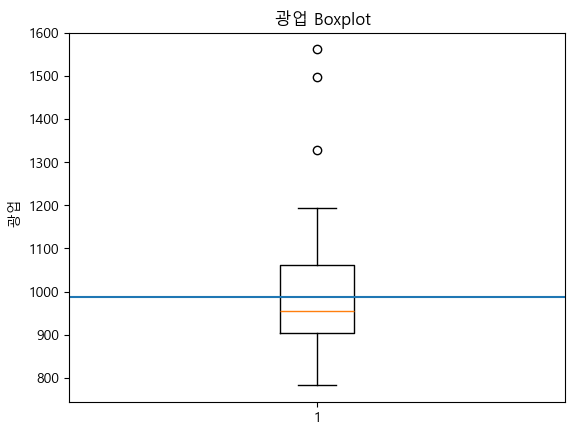


📊   제조업
Mean: 272587.741
Q1  : 196002.950
Q3  : 340773.850


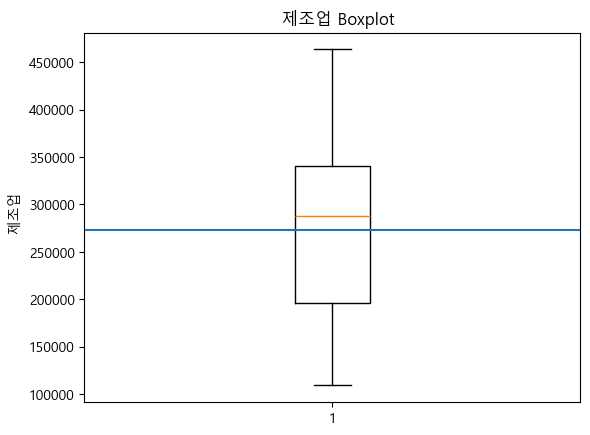


📊     식료품 및 음료
Mean: 18560.077
Q1  : 10942.650
Q3  : 25438.500


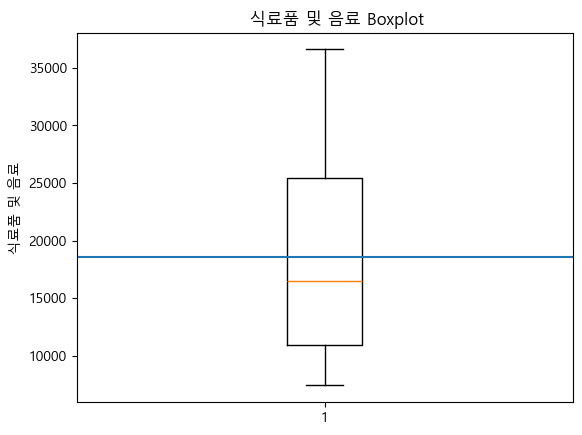


📊     담배
Mean: 81.785
Q1  : 17.000
Q3  : 113.800


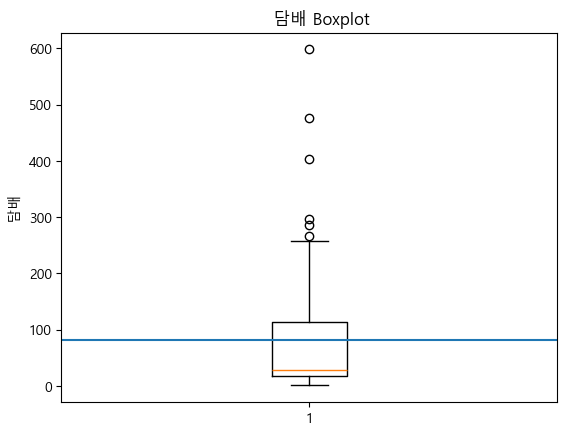


📊     섬유제품
Mean: 9153.716
Q1  : 7247.550
Q3  : 10795.800


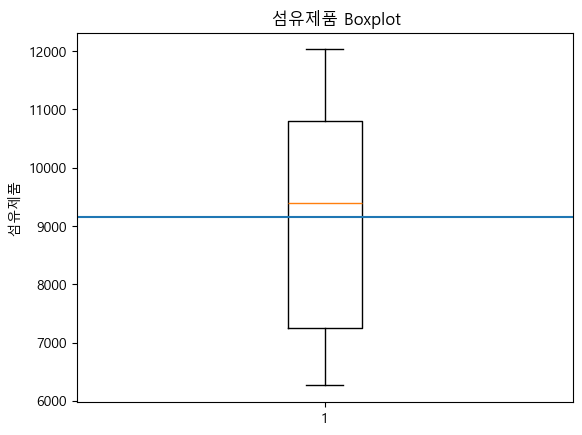


📊     의복, 의복액세서리 및 모피제품
Mean: 6434.825
Q1  : 5111.200
Q3  : 7525.050


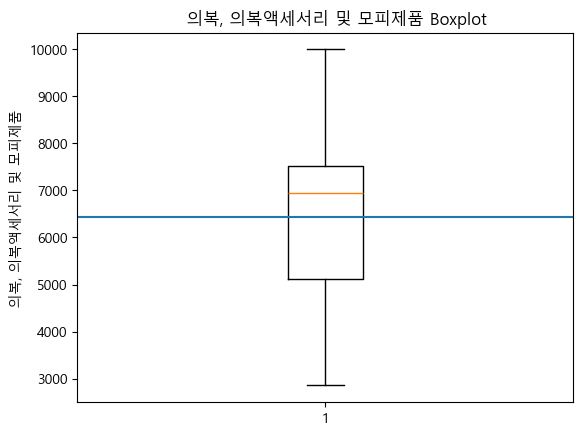


📊     가죽, 가방 및 신발
Mean: 1828.490
Q1  : 1470.350
Q3  : 2163.400


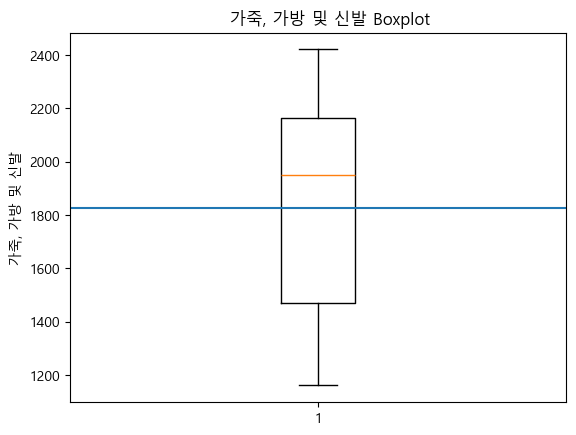


📊     목재 및 나무제품
Mean: 2798.956
Q1  : 2156.050
Q3  : 3551.400


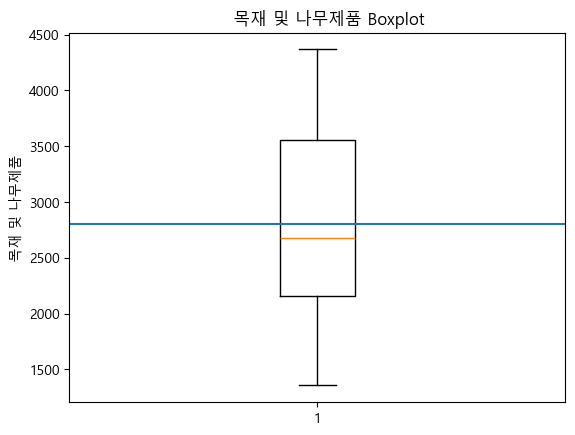


📊     펄프, 종이 및 종이제품
Mean: 6053.223
Q1  : 4821.950
Q3  : 7040.400


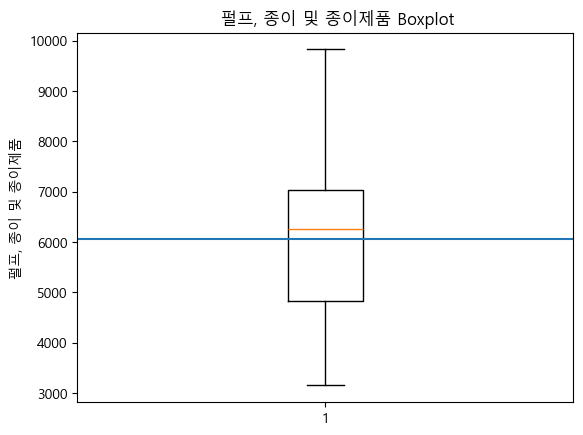


📊     인쇄 및 기록매체
Mean: 3567.641
Q1  : 2949.900
Q3  : 4591.550


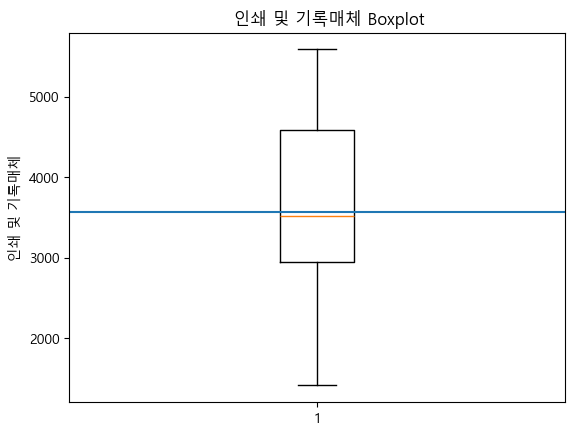


📊     코크스, 연탄 및 석유정제품
Mean: 2466.845
Q1  : 1562.350
Q3  : 2791.400


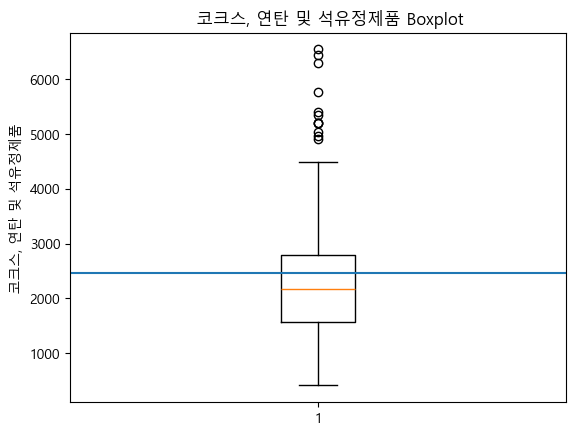


📊     화학제품 및 의료용 제품
Mean: 26777.707
Q1  : 17918.250
Q3  : 31755.600


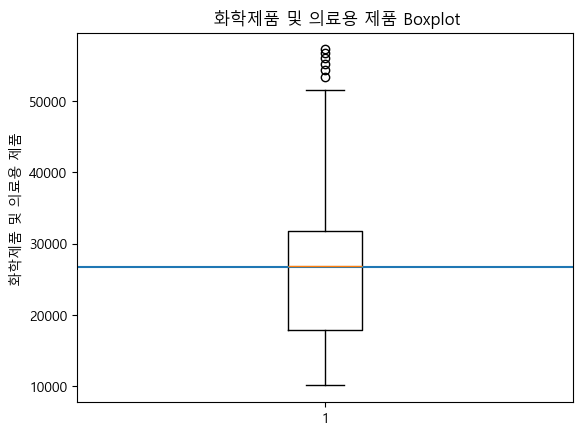


📊     고무제품 및 플라스틱 제품
Mean: 16930.324
Q1  : 10862.250
Q3  : 22592.400


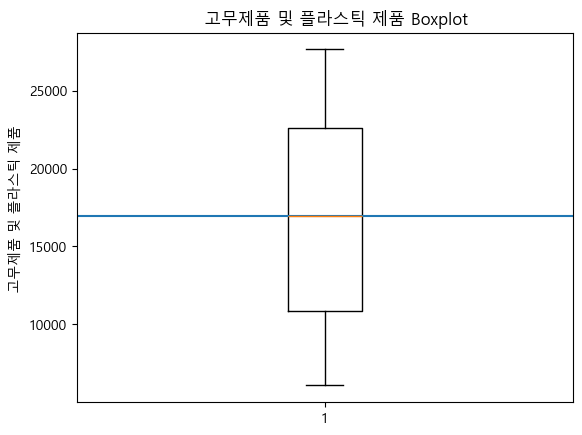

In [3]:
def section(title):
    print("\n" + "="*60)
    print(f"📌 {title}")
    print("="*60)

# ============================================================
# DF4: 기업대출_산업별.csv
# ✅ 분기별 데이터(Quarterly)
# ✅ 행렬 변환(전치) 필수
# ✅ 날짜: datetime (yyyy-mm-dd)  ※ 분기 데이터 → 분기 시작일로 저장
# ✅ 2004Q1 이후만 사용
# ✅ 결측치 처리(권장안 반영): 선형보간 → 잔여 NaN 행 drop
# ✅ YoY 컬럼: 2005Q1부터 유효 (전년동기 필요 → 4분기 차이)
# ✅ YoY 기준 Z-score 컬럼: YoY가 존재하는 구간(2005Q1~) 기준으로 계산
# ✅ 박스플롯은 "원본 수치 컬럼"만 (yoy/z 제외)
# ✅ 합계 무결성 체크 포함
# ============================================================

# 1) 로딩
df4_raw = pd.read_csv("data/기업대출_산업별.csv")
df4 = df4_raw.copy()

section("DF4 RAW HEAD")
display(df4.head())

# 2) 메타 컬럼 삭제
meta_cols = [c for c in df4.columns if any(k in str(c) for k in ["통계표", "단위", "변환"])]
df4 = df4.drop(columns=meta_cols, errors="ignore")

# 3) 첫 컬럼(계정항목)을 index로
item_col = df4.columns[0]
df4 = df4.set_index(item_col)

# 4) 행렬 변환(전치)
df4_t = df4.T.reset_index().rename(columns={"index": "date_raw"})

# 5) 분기 date 생성: 'YYYY/Qn' -> 'YYYYQn' -> Period[Q]
s = df4_t["date_raw"].astype(str).str.strip()
s = s.str.replace(" ", "", regex=False).str.replace("/", "", regex=False)  # 2003/Q1 -> 2003Q1
q_period = pd.PeriodIndex(s, freq="Q")

# ✅ datetime(yyyy-mm-dd)로 저장: 분기 시작일로 변환
# 예: 2004Q1 -> 2004-01-01
df4_t["date"] = q_period.to_timestamp(how="start")

section("DATE 변환 확인")
print("NaT 개수:", df4_t["date"].isna().sum(), "/", len(df4_t))

# 6) 2004Q1 이후만 사용 (datetime 기준)
df4_t = df4_t[df4_t["date"] >= pd.Timestamp("2004-01-01")]

# 7) 값 컬럼 numeric 변환
value_cols = [c for c in df4_t.columns if c not in ["date_raw", "date"]]
for col in value_cols:
    df4_t[col] = (
        df4_t[col].astype(str)
        .str.replace(",", "", regex=False)
        .str.replace(" ", "", regex=False)
        .replace({"": np.nan, "-": np.nan, "nan": np.nan, "None": np.nan})
    )
    df4_t[col] = pd.to_numeric(df4_t[col], errors="coerce")

# 8) 최종 df4 정리 (date 첫 컬럼 + 정렬)
df4 = (
    df4_t.drop(columns=["date_raw"])
    .sort_values("date")
    .reset_index(drop=True)
)
df4 = df4[["date"] + [c for c in df4.columns if c != "date"]]

# ============================================================
# 9) 결측치 처리 (선형보간 → 잔여 NaN 행 drop)
# ============================================================
section("결측치 처리: 선형보간 → 잔여 NaN 행 drop")

base_num_cols = df4.select_dtypes(include=np.number).columns.tolist()

df4[base_num_cols] = df4[base_num_cols].interpolate(method="linear", limit_direction="both")

before_rows = len(df4)
na_rows = df4[base_num_cols].isna().any(axis=1).sum()
print("보간 후에도 NaN 남은 행 수:", na_rows)

df4 = df4.dropna(subset=base_num_cols).reset_index(drop=True)
print("제거된 행 수:", before_rows - len(df4))

# ============================================================
# 10) 합계 무결성 체크 (산업별대출금 = 7개 산업 합)
# ============================================================
section("합계 무결성 체크")

total_col = "산업별대출금"
parts = [
    "농업, 임업 및 어업",
    "광업",
    "제조업",
    "전기, 가스, 증기 및 공기조절 공급업",
    "수도ㆍ하수 및 폐기물 처리, 원료재생업",
    "건설업",
    "서비스업",
]

missing_cols = [c for c in [total_col] + parts if c not in df4.columns]
if missing_cols:
    print("⚠️ 아래 컬럼이 없어 합계 검증을 스킵함:", missing_cols)
else:
    df4["산업합_7개"] = df4[parts].sum(axis=1, skipna=False)
    df4["합계차이"] = df4[total_col] - df4["산업합_7개"]
    print("최대 절대차:", df4["합계차이"].abs().max())

# ============================================================
# 11) YoY (분기 → 4분기 차이) + YoY 기준 Z-score
#     YoY 유효: 2005Q1부터 (2004Q1~이 있어야 전년동기 가능)
# ============================================================
section("YoY + YoY 기준 Z-score 생성")

# (원본 수치 컬럼만 대상으로 YoY 생성)
base_num_cols = df4.select_dtypes(include=np.number).columns.tolist()

for c in base_num_cols:
    df4[f"{c}_yoy"] = df4[c].pct_change(4) * 100  # 전년동기 대비 %

# 2005-01-01(=2005Q1 시작일) 이후를 기준으로 z-score 계산
mask_2005 = df4["date"] >= pd.Timestamp("2005-01-01")

for c in base_num_cols:
    yc = f"{c}_yoy"
    mu = df4.loc[mask_2005, yc].mean()
    sigma = df4.loc[mask_2005, yc].std(ddof=0)
    df4[f"{yc}_z"] = (df4[yc] - mu) / sigma

# ============================================================
# 12) 간단 EDA
# ============================================================
section("DF4 HEAD (전처리 + YoY/Z 포함)")
display(df4.head(10))

section("DF4 SHAPE")
print(df4.shape)

section("DF4 DTYPES")
display(pd.DataFrame(df4.dtypes, columns=["dtype"]))

# ============================================================
# 13) 박스플롯 + Mean/Q1/Q3  (✅ 원본 수치 컬럼만, yoy/z 제외)
# ============================================================
section("BOXPLOT (원본 수치 컬럼만: Mean / Q1 / Q3)")

# yoy/z, 합계검증 컬럼 제외하고 '원본 수치 컬럼'만 그리기
exclude_suffixes = ("_yoy", "_yoy_z")
exclude_exact = {"산업합_7개", "합계차이"}

plot_cols = [
    c for c in df4.columns
    if (c != "date")
    and pd.api.types.is_numeric_dtype(df4[c])
    and (not c.endswith(exclude_suffixes))
    and (c not in exclude_exact)
]

for col in plot_cols[:15]:  # 너무 많으면 15개만 (원하면 숫자 조절)
    mean_val = df4[col].mean()
    Q1 = df4[col].quantile(0.25)
    Q3 = df4[col].quantile(0.75)

    print(f"\n📊 {col}")
    print(f"Mean: {mean_val:.3f}")
    print(f"Q1  : {Q1:.3f}")
    print(f"Q3  : {Q3:.3f}")

    plt.figure()
    plt.boxplot(df4[col].dropna())
    plt.axhline(mean_val)
    plt.title(f"{col} Boxplot")
    plt.ylabel(col)
    plt.show()


In [4]:
# ✅ CSV 저장 (Period는 문자열로 저장)
df4_to_save = df4.copy()
df4_to_save["date"] = df4_to_save["date"].astype(str)
df4_to_save.to_csv("data/기업대출_전처리완료.csv", index=False, encoding="utf-8-sig")